# SmileFace - Smile Classifier applied to a wheelchair control

### Abstract
Assistive robotics solutions help people regain their mobility and autonomy lost in their daily lives.
JoyFace is a human machine interface based on head postures and facial expressions to control a robotized wheelchair. This work presents a comparison between two smile classifiers based on machine learning techniques to be integrated into the JoyFace system.

### Introduction

According to (World Health Organization, 2011), more than one billion people in the world suffer from some form of disability, being about 200 million with considerable functional difficulties. In Brazil, over 45 million of the population have some disability, among which 13 million of them suffer from severe motor disabilities (IBGE, 2010).
<p> Recent works bring different solutions for wheelchair alternative controls. (Chauhan et al., 2016) developed a wheelchair controlled by voice commands, however this solution can have the influence of the environment’s sounds.(Kim et al., 2013) implemented a control based on commands sent through the tongue. (Rohmer, Pinheiro, Raizer, Olivi and Cardozo, 2015) proposed a control for assistive robotics vehicles using small movements of the face or limbs through Electromyograph (EMG) and signals generated by brain activity Electroencephalograph (EEG).
<p> The JoyFace is a system based on Computer Vision developed to control a wheelchair through facial expressions. The <i>video</i> 1 shows a preview of the system overview, utilizing a simulation. This Human Machine Interface considers the displacement of the user’s face relative to a reference region.The face is identified by a regular webcam and verify the face positions. Each position is associated with a movement control of the wheelchair.
<p>In this article, we present a simulation of a Machine Human Interface (HMIs) to control a robotized wheelchair using the head displacement and facial expressions. The early results have to lead us to conclude that the system needs several modifications to be considered as a safe and reliable solution for people paralyzed from down the neck.

Video 1 - [See the video preview simulation here](https://www.youtube.com/watch?v=uzecwOaiKik)

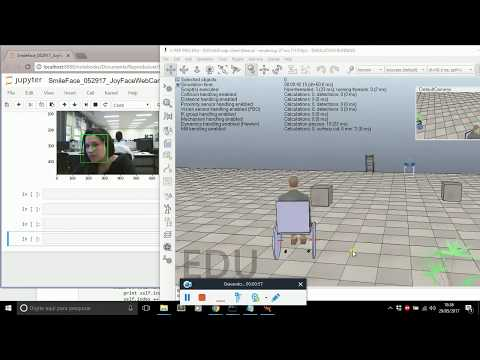

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo("uzecwOaiKik")

### Method

<p>In performing this work, was first necessary to define which facial expressions should be used in the proposed human-computer interaction. We analyzed a range of possible facial expressions and observed which are frequently used involuntarily and those that are used voluntarily. This phase is important because it prevents us from adopting an interaction that generates false negatives or false positives throughout its use.From this point will be implemented computer vision techniques through the OpenCV library using a regular webcam.

<p>The displacement of the face was selected to indicate the movement of the wheelchair up, to the right and the left, by offering an intuitive control option for the user. The smile was chosen for the stop function because although it is the facial expression that can be involuntary is simple identification by the system and after a brief period of training the user can offer the commands that want at the right time.

<p>The system consists of a robotized wheelchair simulated in the V-REP software and a Human Machine Interface (HMI) called JoyFace. Figure 1 illustrates the system overview of the real robotized wheelchair. In this Master’s thesis (Júnior, 2016) documented its architecture, models, control and applications used in this wheelchair, the author has analyzed many commercial and academic developed wheelchairs and based on his research he proposed an architecture of robotic wheelchair that could be controlled by a wide range of assistive interfaces.

<p>An Arduino Mega 2560 is responsible for connecting some sensors and providing the embedded control to actuate on the independent modules of the rear wheels whereas the front caster wheels can roll freely. This mobile robot has two emergency stop buttons one close to each arm support. One encoder in each motor to measure the wheels’ dislocation and a laser range finder to measure distances to obstacles.

<p>A Raspberry Pi Mobel B+ implements the communication between high-level applications and the low-level layer which is responsible for the control and sensing. The software embedded in this intermediate layer is a RESTful application which uses HTTP protocol. In this way, we can use any programming language that can handle HTTP requisitions to communicate with the robotized wheelchair.

<p>In this work, we have the robotic room of the DCA department simulate in the V-REP environment that allows us utilized this robotized wheelchair. The Virtual Robot Experimentation Platform [4] or simply V-REP is a  framework of simulator versatile and scalable. Has a remote API interface that allows interacting with an external entity via socket communication. It is composed of remote API server services and remote API clients. The client side can be embedded as a small footprint code (C/C++, Python, Java, Matlab & Urbi) in virtually any hardware including real robots, and allows remote function call, as well as fast data streaming back and forth.

![alternate text](https://github.com/suzanasvm/SmileFace/blob/master/figures/figure_1.png?raw=true)

### JoyFace
<p>The JoyFace HMI considers the displacement of the user’s face about a reference region. The face is identified by a regular webcam and verify the face positions. Each position is associated with a movement control of the wheelchair.
<p>JoyFace was implemented in Python language and uses face detection based on the Viola-Jones classifiers incorporated into the OpenCV library (Viola and Jones, 2001).These classifiers use Haar Cascade features that are applied to images in real time (Papageorgiou et al., 1998). After detection of the user’s face, we observed the last 40 frames. From there the average face position is calculated, and a reference region demarcated. This reference region will remain static when using JoyFace and can be viewed as a white rectangle.

<p>The centroid of the face detection square is calculated in real time and receives a green circle to highlight the displayed image. This way the user can send commands through the displacement of his nose that has the same position of the calculated centroid. Figure 2 shows how JoyFace HMI it works. If the user puts the nose above the reference region, the wheelchair begins to move front, if the nose is positioned to the right or left the wheelchair moves to the corresponding side and the smile interrupts the movement of the wheelchair.

![alternate text](https://github.com/suzanasvm/SmileFace/blob/master/figures/figure_2.png?raw=true)



### Workflow

<p>We collect the data in real time, utilizing the webcam interface, the next step it transforms the images in grayscale to improvement the performance. Then we use the OpenCV's classifiers to identify the user's face utilized the green color to demarcated. 

<p>The nose point it's calculated during the execution from the centroid of the face. The smile it's classified using the OpenCV's file too, and we utilize to stop the wheelchair.
A threshold white reference area it's created to indicate to the user the directions of the wheelchair movements. And finally, the commands can be sent for the V-Rep simulate and control the robotic wheelchair. 

![alternate text](https://github.com/suzanasvm/SmileFace/blob/master/figures/Workflow.PNG?raw=true)


### Results

<p>This work proposed a solution that will offer to the person with the motor disability, independence, and autonomy of locomotion, in addition to the control of the environment where it is inserted, thus, improving its quality of life and social inclusion. The results obtained can be replicated through the simulation code available in the annexes of this paper.
<p>Although the results achieved are promising, these upsides rely on the feedback screen with the user‘s face image captured by the notebook webcam. During the navigation, the operator tends to look at the screen to monitor if he is positioning the face landmark (centroid) out of the reference square and in- deed actuating on the wheelchair. The user feels forced to look at the screen during the most of the navigation which is a limitation, as he can not move his head freely without sending undesirable commands to the chair.
<p>As future work, we hope to associate a new facial expression to turn on and off the wheelchair movement system. In this way, the user will have more freedom to do their activities and choose the moment when they want to move the wheelchair.

### Code

In [8]:
import time
import cv2
import matplotlib.pyplot as plt
from IPython import display

In [9]:
##All the functions

def set_classifier(cascPath):
    cascPath = cascPath
    faceCascade = cv2.CascadeClassifier(cascPath)
    return faceCascade
 
def set_nose_point(x,y,w,h,frame):
    #Setting the nose point
    face_x = (x+(w/2))
    face_y = (y+(h/2))
    #Show the green nose point
    cv2.circle(frame,(face_x,face_y), 8, (0,255,0),-1)
           
def set_direction(x,y,ax,ay,stop):
    if(stop == True):
        return "STOP"
    else:
        if y < ay-precision_v: return "UP"
        #elif y > ay+precision_v: return "DOWN"
        elif x < ax-precision_h: return "LEFT"
        elif x > ax+precision_h: return "RIGHT"

In [10]:
#Configuration Variables: don't should be alterated
calc_average = True
count_face = 0 
average_x = 0 
average_y = 0 
sp=0

#This variables below can be alterated

#Change the size of the threshold area
precision_h = 40
precision_v = 30

#For security iniciate the wheelchair with the command STOP
send_command = "STOP"

#Set the velocity of the wheelchair
velocity = 0.5


In [11]:
try:
    import vrep
except:
    print ('"vrep.py" could not be imported."') 

print ('Program started')
#just in case, close all opened connections
vrep.simxFinish(-1) 
#Connect to V-REP
clientID=vrep.simxStart('127.0.0.1',19997,True,True,5000,5) 

if clientID!=-1:
    print ('Connected to remote API server')
    vrep.simxStartSimulation(clientID,vrep.simx_opmode_oneshot)
    res,leftHandle=vrep.simxGetObjectHandle(clientID,'leftM',vrep.simx_opmode_blocking)
    res,rightHandle=vrep.simxGetObjectHandle(clientID,'rightM',vrep.simx_opmode_blocking)


Program started
Connected to remote API server


In [12]:
#Open the first webcam
vc = cv2.VideoCapture(0)
# try to get the first frame
if vc.isOpened(): 
    is_capturing, frame = vc.read()  
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

while is_capturing:
    try:    
        #Iniciate to read the webcam
        is_capturing, frame = vc.read()
        #Flip the image
        frame = cv2.flip(frame,180) 
        #Filter grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #Show for the user the image with colors
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
        #Set the OpenCV Face Classifier
        faceCascade = set_classifier('haarcascade_frontalface_default.xml')
        #Set the OpenCV Smile Classifier
        smileCascade = set_classifier('haarcascade_smile.xml')

        #Set the parameters for detect the face
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=8,
            minSize=(120, 120)
        )
        #Found the face
        for (x, y, w, h) in faces:
            #Draw the green rectangle of the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            #Calcule the centroid of the face and set green point
            set_nose_point(x,y,w,h,frame)    
            
            #Define Region of Intereting of Smile
            roi_smile = frame[y:y+h, x:x+w]
            
            #Set the parameters for detect the smile
            smile = smileCascade.detectMultiScale(
            roi_smile,
            scaleFactor=2.7,
            minNeighbors=20,
            minSize=(10, 10)  
            )
            
            #Found the smile
            for(sp,sq,sr,ss) in smile:
                #Draw the red rectangle of the smile
                cv2.rectangle(roi_smile,(sp,sq),(sp+sr,sq+ss), (255,0,0),thickness=2)
                
            #Any time the smile can stop the wheelchair
            if sp in smile:
                stop = True
            else:
                stop = False

            #Calcule the threshold white area
            if calc_average:
                count_face += 1
                average_x += (x+(w/2))
                average_y += (y+(h/2))
                progress = (count_face/60.0) * 100
                
                if count_face==3:
                    average_x /= count_face
                    average_y /= count_face
                    calc_average = False
            else:   
                face_x = (x+(w/2)) 
                face_y = (y+(h/2))
                flag_save = True
                
                #Draw the threshold white area
                cv2.rectangle(frame, (average_x-precision_h,average_y-precision_v),
                                         (average_x+precision_h,average_y+precision_v), (255,255,255),thickness=2)   
                
                #Verify the direction of the face and associate with a command: UP,LEFT,RIGHT,STOP
                send_command = set_direction(face_x,face_y,average_x,average_y,stop)
                
                #Send the commands fot the wheelchair
                if(send_command == "UP"):
                    vrep.simxSetJointTargetVelocity(clientID,leftHandle,velocity,vrep.simx_opmode_oneshot)
                    vrep.simxSetJointTargetVelocity(clientID,rightHandle,velocity,vrep.simx_opmode_oneshot)
                if(send_command == "RIGHT"):
                    vrep.simxSetJointTargetVelocity(clientID,leftHandle,velocity,vrep.simx_opmode_oneshot)
                    vrep.simxSetJointTargetVelocity(clientID,rightHandle,-velocity,vrep.simx_opmode_oneshot)
                    time.sleep(0.5)
                    vrep.simxSetJointTargetVelocity(clientID,leftHandle,velocity,vrep.simx_opmode_oneshot)
                    vrep.simxSetJointTargetVelocity(clientID,rightHandle,velocity,vrep.simx_opmode_oneshot)
                if(send_command == "LEFT"):
                    vrep.simxSetJointTargetVelocity(clientID,rightHandle,velocity,vrep.simx_opmode_oneshot)
                    vrep.simxSetJointTargetVelocity(clientID,leftHandle,-velocity,vrep.simx_opmode_oneshot)
                    time.sleep(0.5)
                    vrep.simxSetJointTargetVelocity(clientID,leftHandle,velocity,vrep.simx_opmode_oneshot)
                    vrep.simxSetJointTargetVelocity(clientID,rightHandle,velocity,vrep.simx_opmode_oneshot)
                if(send_command == "STOP"):
                    vrep.simxSetJointTargetVelocity(clientID,rightHandle,0,vrep.simx_opmode_oneshot)
                    vrep.simxSetJointTargetVelocity(clientID,leftHandle,0,vrep.simx_opmode_oneshot)
        
        #See the webcam feedback                                    
        webcam_preview.set_data(frame)
        plt.draw()

        display.clear_output(wait=True)
        display.display(plt.gcf())

    except KeyboardInterrupt:
        vc.release()

### References

<br>Chauhan, R., Jain, Y., Agarwal, H. and Patil, A. (2016). Study of implementation of voice con- trolled wheelchair, Advanced Computing and Communication Systems (ICACCS), 2016 3rd International Conference on, Vol. 1, IEEE, pp. 1–4.

<br>Júnior, A. (2016). Robotização de uma cadeira de rodas motorizada: arquitetura, modelos, controle e aplicações. Master’s thesis, School of Electrical and Computer Engineering, FEEC, UNICAMP.

<br>Kim, J., Park, H., Bruce, J., Sutton, E., Rowles, D., Pucci, D., Holbrook, J.,Minocha, J., Nardone, B., West, D. et al. (2013). The tongue enables computer and wheelchair control for people with spinal cord injury, Science translational medicine 5(213): 213ra166–213ra166.

<br>Rohmer, E., Pinheiro, P., Raizer, K., Olivi, L. and Cardozo, E. (2015). A novel platform supporting multiple control strategies for assistive robots, Robot and Human Interactive Communication (RO-MAN), 2015 24th IEEE International Symposium on, IEEE, pp. 763–769.

<br>World Health Organization (2011). World report on disability., World Health Organization.

<br>Viola, P. and Jones, M. (2001). Robust real time object detection, International Journal of Computer Vision 4(34–47).

<br>Papageorgiou, C. P., Oren, M. and Poggio, T. (1998). A general framework for object detection, Computer vision, 1998. Sixth international conference on, IEEE, pp. 555–562.

<br>IBGE (2010). Cartilha do censo 2010: Pessoas com deficiência, Brasília: Secretaria de Direitos Humanos da Presidência da República (SDH)/Secretaria Nacional de Promoção dos Direitos da Pessoa com Deficiência (SNPD).





